In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("breastCancer.csv")
df.head()


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.drop(columns=["id"], inplace=True)


In [4]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)


In [5]:
df = df.apply(pd.to_numeric)


In [9]:
X = df.drop("class", axis=1)
y = df["class"].replace({2: 0, 4: 1})  
print(X)
print(y)

     clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0                  5                1                 1                  1   
1                  5                4                 4                  5   
2                  3                1                 1                  1   
3                  6                8                 8                  1   
4                  4                1                 1                  3   
..               ...              ...               ...                ...   
694                3                1                 1                  1   
695                2                1                 1                  1   
696                5               10                10                  3   
697                4                8                 6                  4   
698                4                8                 8                  5   

     epithelial_size  bare_nucleoli  bland_chromatin  normal_nu

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.19790469 -0.70221201 -0.74177362 ... -0.18182716 -0.61292736
  -0.34839971]
 [ 0.19790469  0.27725185  0.26278299 ... -0.18182716 -0.28510482
  -0.34839971]
 [-0.51164337 -0.70221201 -0.74177362 ... -0.18182716 -0.61292736
  -0.34839971]
 ...
 [ 0.19790469  2.23617957  2.2718962  ...  1.86073779  2.33747554
   0.22916583]
 [-0.15686934  1.58320366  0.93248739 ...  2.67776377  1.02618536
  -0.34839971]
 [-0.15686934  1.58320366  1.6021918  ...  2.67776377  0.37054027
  -0.34839971]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train,X_test,y_train,y_test)

[[-0.51164337 -0.70221201 -0.74177362 ... -0.99885314 -0.61292736
  -0.34839971]
 [ 0.90745276  1.90969161  0.26278299 ...  0.63519882  0.04271773
   0.80673136]
 [ 0.19790469 -0.37572406  0.26278299 ... -0.99885314 -0.61292736
  -0.34839971]
 ...
 [ 1.97177486  0.6037398   1.2673396  ... -0.18182716  0.04271773
   3.69455903]
 [-0.15686934 -0.70221201 -0.74177362 ... -0.59034015 -0.61292736
  -0.34839971]
 [ 1.97177486  2.23617957  2.2718962  ...  1.86073779  1.68183045
   3.69455903]] [[ 1.26222679 -0.0492361   0.26278299 ... -0.18182716  0.04271773
  -0.34839971]
 [ 1.26222679  1.58320366  1.2673396  ...  1.4522248   1.68183045
   3.1169935 ]
 [-1.22119144 -0.70221201 -0.74177362 ... -0.18182716 -0.61292736
  -0.34839971]
 ...
 [ 0.19790469  0.6037398   0.59763519 ...  1.4522248   0.04271773
   3.1169935 ]
 [-1.22119144 -0.70221201 -0.74177362 ... -0.59034015 -0.61292736
  -0.34839971]
 [-0.51164337 -0.70221201 -0.74177362 ... -0.59034015 -0.61292736
  -0.34839971]] 452    0
264    

In [13]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [14]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")


SVM Accuracy: 0.97


In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[78  1]
 [ 3 55]]


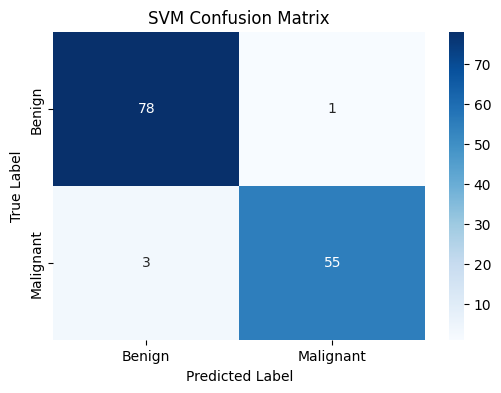

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)

print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

if accuracy > log_accuracy:
    print("Note: SVM performs slightly better than Logistic Regression on this dataset.")
else:
    print("Note: Logistic Regression performs similarly or slightly better.")


Logistic Regression Accuracy: 0.96
Note: SVM performs slightly better than Logistic Regression on this dataset.
